<a href="https://colab.research.google.com/github/sandhrabijoy/Time-series/blob/main/Timeseries_using_multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
pip install --upgrade tensorflow

In [146]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [147]:
df=pd.read_csv('/content/jena_climate_2009_2016.csv')

In [148]:
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [149]:
df=df[5::6]
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [150]:
df.index= pd.to_datetime(df['Date Time'],format='%d.%m.%Y %H:%M:%S')

In [151]:
df[:26]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
2009-01-01 06:00:00,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
2009-01-01 07:00:00,01.01.2009 07:00:00,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.8
2009-01-01 08:00:00,01.01.2009 08:00:00,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
2009-01-01 09:00:00,01.01.2009 09:00:00,999.69,-7.66,265.52,-8.84,91.2,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.2


<Axes: xlabel='Date Time'>

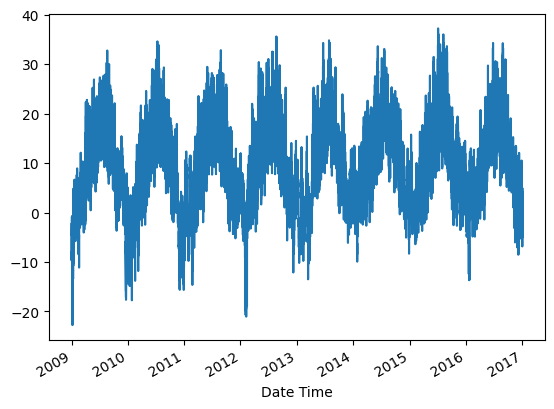

In [152]:
temp=df['T (degC)']
temp.plot()

In [153]:
def df_to_X_y(df,window_size=5):

  df_as_np=df.to_numpy()
  X=[]
  y=[]
  for i in range(len(df_as_np)-window_size):
    row=[[a]for a in df_as_np[i:i+5]]
    X.append(row)
    label=df_as_np[i+5]
    y.append(label)
  return np.array(X),np.array(y)

In [154]:
WINDOW_SIZE=5
X,y=df_to_X_y(temp,WINDOW_SIZE)
X.shape,y.shape

((70086, 5, 1), (70086,))

In [155]:
X_train,y_train=X[:60000],y[:60000]
X_val,y_val=X[60000:65000],y[60000:65000]
X_test,y_test=X[65000:],y[65000:]
X_train.shape,X_val.shape,X_test.shape,y_train.shape,y_test.shape,y_val.shape

((60000, 5, 1), (5000, 5, 1), (5086, 5, 1), (60000,), (5086,), (5000,))

In [156]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1=Sequential()
model1.add(LSTM(64, input_shape=(5, 1)))
model1.add(Dense(1))

model1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

In [157]:
cp = ModelCheckpoint('model1/model1_checkpoint.keras', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])


In [158]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp])


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 70.7211 - root_mean_squared_error: 8.2291 - val_loss: 2.1632 - val_root_mean_squared_error: 1.4708
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 6.8155 - root_mean_squared_error: 2.6056 - val_loss: 0.9243 - val_root_mean_squared_error: 0.9614
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 2.5625 - root_mean_squared_error: 1.5983 - val_loss: 0.6262 - val_root_mean_squared_error: 0.7913
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 1.3098 - root_mean_squared_error: 1.1429 - val_loss: 0.5221 - val_root_mean_squared_error: 0.7225
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.8591 - root_mean_squared_error: 0.9267 - val_loss: 0.5176 - val_root_mean_squared_error: 0.7195
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.7537 - root_mean_squared_error: 0.8678 - val_loss: 0.5193 - val_root_mean_squared_error: 0.7206
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━

MULTIVARIATE


In [159]:
model2=Sequential()
model2.add(Conv1D(64, input_shape=(5, 1),kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8,'relu'))
model2.add(Dense(1,'linear'))

model2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 4, 64)               │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 8)                   │           2,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,257 (8.82 KB)

 Trainable params: 2,257 (8.82 KB)

 Non-trainable params: 0 (0.00 B)

In [160]:
cp2 = ModelCheckpoint('model2/model2_checkpoint.keras', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [161]:
model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp2])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 24.7450 - root_mean_squared_error: 4.5154 - val_loss: 0.9647 - val_root_mean_squared_error: 0.9822
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 1.1715 - root_mean_squared_error: 1.0819 - val_loss: 0.7249 - val_root_mean_squared_error: 0.8514
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.8573 - root_mean_squared_error: 0.9257 - val_loss: 0.5420 - val_root_mean_squared_error: 0.7362
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.7070 - root_mean_squared_error: 0.8408 - val_loss: 0.5135 - val_root_mean_squared_error: 0.7166
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6807 - root_mean_squared_error: 0.8249 - val_loss: 0.5055 - val_root_mean_squared_error: 0.7110
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6641 - root_mean_squared_error: 0.8149 - val_loss: 0.5108 - val_root_mean_squared_error: 0.7147
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━

In [162]:
model3=Sequential()
model3.add(GRU(64, input_shape=(5, 1)))
model3.add(Flatten())
model3.add(Dense(8,'relu'))
model3.add(Dense(1,'linear'))

model2.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 4, 64)               │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 8)                   │           2,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,773 (26.46 KB)

 Trainable params: 2,257 (8.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,516 (17.64 KB)

In [163]:
cp3 = ModelCheckpoint('model3/model3_checkpoint.keras', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [164]:
model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp3])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 62.4596 - root_mean_squared_error: 7.6387 - val_loss: 1.1065 - val_root_mean_squared_error: 1.0519
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 2.1746 - root_mean_squared_error: 1.4708 - val_loss: 0.6358 - val_root_mean_squared_error: 0.7974
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.9453 - root_mean_squared_error: 0.9719 - val_loss: 0.5281 - val_root_mean_squared_error: 0.7267
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.7285 - root_mean_squared_error: 0.8534 - val_loss: 0.5077 - val_root_mean_squared_error: 0.7125
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.6772 - root_mean_squared_error: 0.8228 - val_loss: 0.5153 - val_root_mean_squared_error: 0.7179
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.6617 - root_mean_squared_error: 0.8134 - val_loss: 0.5018 - val_root_mean_squared_error: 0.7084
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━

In [165]:
tempdf=pd.DataFrame({'Temperature':temp})
tempdf['Seconds']=tempdf.index.map(pd.Timestamp.timestamp)
tempdf

,Temperature,Seconds
Date Time,,
2009-01-01 01:00:00,-8.05,1.230772e+09
2009-01-01 02:00:00,-8.88,1.230775e+09
2009-01-01 03:00:00,-8.81,1.230779e+09
2009-01-01 04:00:00,-9.05,1.230782e+09
2009-01-01 05:00:00,-9.63,1.230786e+09
...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09
2016-12-31 20:10:00,-1.40,1.483215e+09
2016-12-31 21:10:00,-2.75,1.483219e+09


In [166]:
day=60*60*24
year=365.2425*day


tempdf['Day sin']=np.sin(tempdf['Seconds']*(2*np.pi/day))
tempdf['Day cos']=np.cos(tempdf['Seconds']*(2*np.pi/day))
tempdf['Year sin']=np.sin(tempdf['Seconds']*(2*np.pi/year))
tempdf['Year cos']=np.cos(tempdf['Seconds']*(2*np.pi/year))
tempdf

,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,-8.05,1.230772e+09,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,1.230775e+09,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,1.230779e+09,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,1.230782e+09,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,1.230786e+09,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09,-0.953717,0.300706,0.006900,0.999976
2016-12-31 20:10:00,-1.40,1.483215e+09,-0.843391,0.537300,0.007617,0.999971
2016-12-31 21:10:00,-2.75,1.483219e+09,-0.675590,0.737277,0.008334,0.999965


In [167]:
tempdf=tempdf.drop('Seconds',axis=1)

In [168]:
tempdf.head()

,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 01:00:00,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,0.965926,0.258819,0.012916,0.999917


In [169]:
def df_to_X_y2(df,window_size=6):
  df_as_np=df.to_numpy()
  X=[]
  y=[]
  for i in range(len(df_as_np)-window_size):
    row=[r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label=df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X),np.array(y)


In [170]:
X2,y2=df_to_X_y2(tempdf)
X2.shape,y2.shape

((70085, 6, 5), (70085,))

In [171]:
X2_train,y2_train=X2[:20000],y2[:20000]

In [172]:
X2_val,y2_val=X2[20000:25000],y2[20000:25000]

In [173]:
X2_test,y2_test=X2[25000:],y2[25000:]

In [174]:
X2_train.shape,X2_test.shape,X2_val.shape,y2_train.shape,y2_test.shape,y2_val.shape


((20000, 6, 5), (45085, 6, 5), (5000, 6, 5), (20000,), (45085,), (5000,))

In [175]:
temp_training_mean=np.mean(X2_train[:,:,0])
temp_training_std=np.std(X2_train[:,:,0])
def preprocess(X):
  X[:,:,0]=(X[:,:,0]-temp_training_mean)/temp_training_std
  return X

In [176]:
preprocess(X2_val)
preprocess(X2_train)
preprocess(X2_test)

array([[[-0.26912176, -0.98480775, -0.17364818, -0.80573241,
          0.59227973],
        [-0.31284231, -0.9961947 ,  0.08715574, -0.80530767,
          0.59285712],
        [-0.36216807, -0.93969262,  0.34202014, -0.80488251,
          0.59343419],
        [-0.46194061, -0.81915204,  0.57357644, -0.80445694,
          0.59401097],
        [-0.44064085, -0.64278761,  0.76604444, -0.80403096,
          0.59458744],
        [-0.45745645, -0.42261826,  0.90630779, -0.80360456,
          0.5951636 ]],

       [[-0.31284231, -0.9961947 ,  0.08715574, -0.80530767,
          0.59285712],
        [-0.36216807, -0.93969262,  0.34202014, -0.80488251,
          0.59343419],
        [-0.46194061, -0.81915204,  0.57357644, -0.80445694,
          0.59401097],
        [-0.44064085, -0.64278761,  0.76604444, -0.80403096,
          0.59458744],
        [-0.45745645, -0.42261826,  0.90630779, -0.80360456,
          0.5951636 ],
        [-0.49220869, -0.17364818,  0.98480775, -0.80317775,
          0.5

In [177]:
model4=Sequential()
model4.add(InputLayer((6,5)))
model4.add(LSTM(64))
model4.add(Dense(8,'relu'))
model4.add(Dense(1,'linear'))
model4.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 64)                  │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,449 (72.07 KB)

 Trainable params: 18,449 (72.07 KB)

 Non-trainable params: 0 (0.00 B)

In [178]:
cp4 = ModelCheckpoint('model4/model4_checkpoint.keras', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [179]:
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp4])

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 105.2702 - root_mean_squared_error: 10.1952 - val_loss: 14.0987 - val_root_mean_squared_error: 3.7548
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 13.3089 - root_mean_squared_error: 3.6441 - val_loss: 8.2804 - val_root_mean_squared_error: 2.8776
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 7.3231 - root_mean_squared_error: 2.7028 - val_loss: 6.0628 - val_root_mean_squared_error: 2.4623
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4.7450 - root_mean_squared_error: 2.1781 - val_loss: 4.8205 - val_root_mean_squared_error: 2.1956
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 3.8183 - root_mean_squared_error: 1.9536 - val_loss: 4.0331 - val_root_mean_squared_error: 2.0083
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 3.0932 - root_mean_squared_error: 1.7584 - val_loss: 3.3403 - val_root_mean_squared_error: 1.8277
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/

In [180]:
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt

def plot_predictions1(model,X,y,start=0,end=100):
  predictions=model.predict(X).flatten()
  df=pd.DataFrame(data={'Predictions':predictions,'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df,mse(y,predictions)

1409/1409 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


(       Predictions  Actuals
 0         3.703293     3.12
 1         3.399047     2.95
 2         3.067008     2.67
 3         2.726722     2.32
 4         2.407138     1.83
 ...            ...      ...
 45080     0.188162    -0.98
 45081    -0.908368    -1.40
 45082    -1.267852    -2.75
 45083    -1.779643    -2.89
 45084    -2.192603    -3.93
 
 [45085 rows x 2 columns],
 1.1519489679147923)

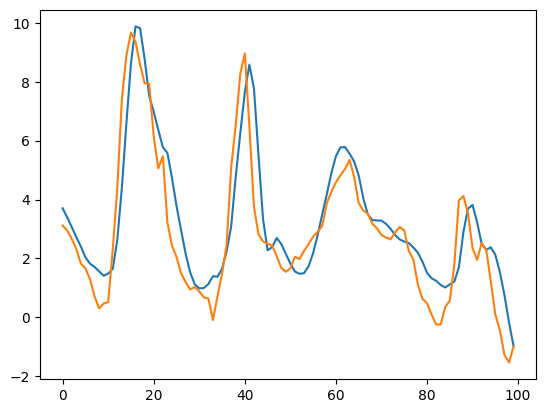

In [181]:
plot_predictions1(model4,X2_test,y2_test)

In [182]:
ptempdf=pd.concat([df['p (mbar)'],tempdf],axis=1)
ptempdf.head()

,p (mbar),Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,996.50,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,996.62,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,996.84,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,996.99,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,997.46,-9.63,0.965926,0.258819,0.012916,0.999917


In [183]:
def df_to_X_y3(df,window_size=7):
  df_as_np=df.to_numpy()
  X=[]
  y=[]
  for i in range(len(df_as_np)-window_size):
    row=[r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label=[df_as_np[i+window_size][0],df_as_np[i+window_size][1]]
    y.append(label)
  return np.array(X),np.array(y)

In [184]:
X3,y3=df_to_X_y3(ptempdf)
X3.shape,y3.shape


((70084, 7, 6), (70084, 2))

In [185]:
X3_train,y3_train=X3[:20000],y3[:20000]

In [186]:
X3_test,y3_test=X3[20000:25000],y3[20000:25000]

In [187]:
X3_val,y3_val=X3[25000:],y3[25000:]

In [188]:
X3_train.shape,X3_test.shape,X3_val.shape,y3_train.shape,y3_test.shape,y3_val.shape


((20000, 7, 6), (5000, 7, 6), (45084, 7, 6), (20000, 2), (5000, 2), (45084, 2))

In [189]:
p_training_mean=np.mean(X3_train[:,:,0])
p_training_std=np.std(X3_train[:,:,0])

temp_training_mean1=np.mean(X3_train[:,:,1])
temp_training_std1=np.std(X3_train[:,:,1])

def preprocess1(X):
  X[:,:,1]=(X[:,:,1]-temp_training_mean1)/temp_training_std1
  X[:,:,0]=(X[:,:,0]-p_training_mean)/p_training_std
  return X

In [190]:
def preprocess_output1(y):
  y[:,1]=(y[:,1]-temp_training_mean1)/temp_training_std1
  y[:,0]=(y[:,0]-p_training_mean)/p_training_std
  return y

In [191]:
preprocess1(X3_train)
preprocess1(X3_test)
preprocess1(X3_val)


array([[[ 0.5378572 , -0.26918113, -0.98480775, -0.17364818,
         -0.80573241,  0.59227973],
        [ 0.53901378, -0.31290361, -0.9961947 ,  0.08715574,
         -0.80530767,  0.59285712],
        [ 0.55289275, -0.36223153, -0.93969262,  0.34202014,
         -0.80488251,  0.59343419],
        ...,
        [ 0.58874674, -0.44070777, -0.64278761,  0.76604444,
         -0.80403096,  0.59458744],
        [ 0.58990332, -0.45752411, -0.42261826,  0.90630779,
         -0.80360456,  0.5951636 ],
        [ 0.59452964, -0.49227788, -0.17364818,  0.98480775,
         -0.80317775,  0.59573945]],

       [[ 0.53901378, -0.31290361, -0.9961947 ,  0.08715574,
         -0.80530767,  0.59285712],
        [ 0.55289275, -0.36223153, -0.93969262,  0.34202014,
         -0.80488251,  0.59343419],
        [ 0.56214539, -0.46200847, -0.81915204,  0.57357644,
         -0.80445694,  0.59401097],
        ...,
        [ 0.58990332, -0.45752411, -0.42261826,  0.90630779,
         -0.80360456,  0.5951636 ],
  

In [192]:
preprocess_output1(y3_train)
preprocess_output1(y3_val)
preprocess_output1(y3_test)

array([[ 0.07406852,  0.30930089],
       [ 0.10182645,  0.25212534],
       [ 0.13536728,  0.19607088],
       ...,
       [ 0.58874674, -0.44070777],
       [ 0.58990332, -0.45752411],
       [ 0.59452964, -0.49227788]])

In [193]:
model5=Sequential()
model5.add(InputLayer((7,6)))
model5.add(LSTM(64))
model5.add(Dense(8,'relu'))
model5.add(Dense(2,'linear'))
model5.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                        │ (None, 64)                  │          18,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,714 (73.10 KB)

 Trainable params: 18,714 (73.10 KB)

 Non-trainable params: 0 (0.00 B)

In [194]:
cp5 = ModelCheckpoint('model5/model5_checkpoint.keras', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [195]:
model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp5])

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.5049 - root_mean_squared_error: 0.6996 - val_loss: 0.1201 - val_root_mean_squared_error: 0.3465
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0624 - root_mean_squared_error: 0.2492 - val_loss: 0.0394 - val_root_mean_squared_error: 0.1984
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.0340 - root_mean_squared_error: 0.1843 - val_loss: 0.0303 - val_root_mean_squared_error: 0.1741
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0274 - root_mean_squared_error: 0.1655 - val_loss: 0.0252 - val_root_mean_squared_error: 0.1589
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0233 - root_mean_squared_error: 0.1525 - val_loss: 0.0212 - val_root_mean_squared_error: 0.1457
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0194 - root_mean_squared_error: 0.1393 - val_loss: 0.0173 - val_root_mean_squared_error: 0.1316
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/st

In [196]:
df.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

In [206]:
def plot_predictions2(model,X,y,start=0,end=100):

  predictions=model.predict(X)

  p_preds,temp_preds=predictions[:,0],predictions[:,1]
  p_actuals,temp_actuals=y[:,0],y[:,1]

  df=pd.DataFrame(data={'Temperature Predictions':temp_preds,
                        'Temperature Actuals':temp_actuals,
                        'Pressure Predictions':p_preds,
                        'Pressure Actuals':p_actuals})

  plt.plot(df['Temperature Predictions'][start:end], label='Temperature Predictions', color='blue')
  plt.plot(df['Temperature Actuals'][start:end], label='Temperature Actuals', color='cyan')
  plt.plot(df['Pressure Predictions'][start:end], label='Pressure Predictions', color='green')
  plt.plot(df['Pressure Actuals'][start:end], label='Pressure Actuals', color='red')
  return df[start:end]


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,0.244830,0.309301,0.051625,0.074069
1,0.276582,0.252125,0.073156,0.101826
2,0.233046,0.196071,0.121404,0.135367
3,0.157317,0.144501,0.173587,0.177004
4,0.081901,0.059298,0.223339,0.253338
...,...,...,...,...
95,0.672823,0.800338,1.112067,1.099955
96,0.720970,0.665807,1.055862,1.098799
97,0.621519,0.634417,1.050792,1.098799
98,0.534678,0.616479,1.068325,1.084920


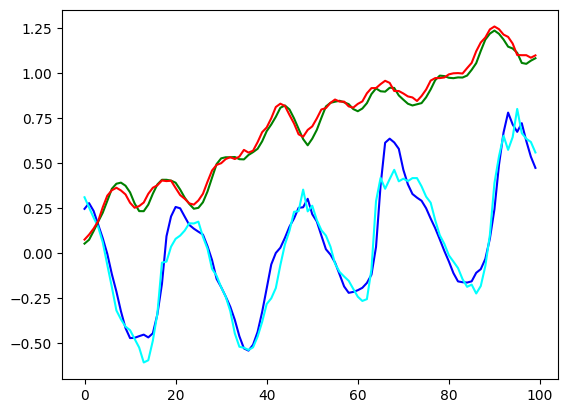

In [207]:
plot_predictions2(model5,X3_test,y3_test)

In [210]:
def postprocess_temp(arr):
  arr=(arr*temp_training_std1)+temp_training_mean1
  return arr

def postprocess_p(arr):
  arr=(arr*p_training_std)+p_training_mean
  return arr

In [211]:
def plot_predictions2(model,X,y,start=0,end=100):

  predictions=model.predict(X)

  p_preds,temp_preds=postprocess_p(predictions[:,0]),postprocess_temp(predictions[:,1])
  p_actuals,temp_actuals=postprocess_p(y[:,0]),postprocess_temp(y[:,1])

  df=pd.DataFrame(data={'Temperature Predictions':temp_preds,
                        'Temperature Actuals':temp_actuals,
                        'Pressure Predictions':p_preds,
                        'Pressure Actuals':p_actuals})

  plt.plot(df['Temperature Predictions'][start:end], label='Temperature Predictions', color='blue')
  plt.plot(df['Temperature Actuals'][start:end], label='Temperature Actuals', color='cyan')
  plt.plot(df['Pressure Predictions'][start:end], label='Pressure Predictions', color='green')
  plt.plot(df['Pressure Actuals'][start:end], label='Pressure Actuals', color='red')
  return df[start:end]

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,9.694927,10.27,988.525940,988.72
1,9.978152,9.76,988.712097,988.96
2,9.589811,9.26,989.129272,989.25
3,8.914318,8.80,989.580444,989.61
4,8.241614,8.04,990.010620,990.27
...,...,...,...,...
95,13.512575,14.65,997.694702,997.59
96,13.942043,13.45,997.208740,997.58
97,13.054953,13.17,997.164917,997.58
98,12.280338,13.01,997.316528,997.46


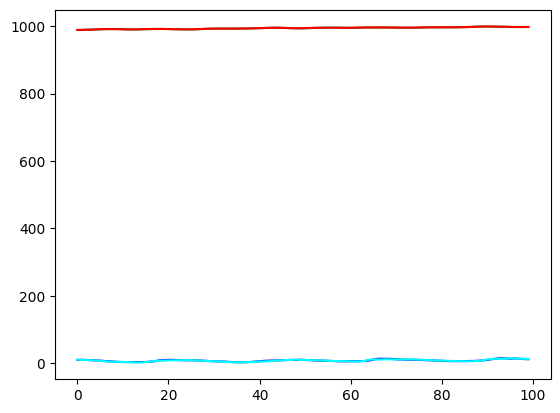

In [212]:
post_processed_df=plot_predictions2(model5,X3_test,y3_test)
post_processed_df